In [1]:
import pandas as pd
import numpy as np
import datetime   # datetime 내 timedelta는 몇주전후 까지만 나와 있음
from dateutil.relativedelta import relativedelta # 몇달전후, 몇년전후를 구하기 위함
from tqdm import tqdm
from scipy import stats

In [2]:
import weatherAPI 

### 날씨데이터 risk_table 제작

In [3]:
hpai=pd.read_csv('HPAI_Weather_occur.csv', encoding='utf-8-sig')

In [4]:
hpai=hpai.drop(['축종', '주소', '진단일', '사육수', '지역명', 'location', 'date', 'lowest_temp(C)',
                  'highest_temp(C)', 'maxWsWd(16방위)'], axis=1) 

In [5]:
hpai['발생일']=hpai['발생일'].astype('str')

In [6]:
hpai['발생일']=hpai['발생일'].map(lambda x : datetime.datetime.strptime(x, '%Y%m%d'))

In [7]:
hpai['month']=hpai['발생일'].map(lambda x: x.month)
hpai['year']=hpai['발생일'].map(lambda x: x.year)
hpai['day']=hpai['발생일'].map(lambda x: x.day)

In [8]:
hpai.head()

,발생일,지역코드,시도,시군구,avg_temp(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%),month,year,day
0,2021-02-23,114,강원도,원주시,1.9,0.0,1.4,28.0,2,2021,23
1,2017-01-03,211,강원도,인제군,1.2,0.0,2.2,60.1,1,2017,3
2,2016-12-09,95,강원도,철원군,-0.1,1.7,1.6,68.9,12,2016,9
3,2016-11-30,95,강원도,철원군,3.2,1.2,0.9,72.1,11,2016,30
4,2008-05-07,101,강원도,춘천시,13.2,17.0,0.6,66.1,5,2008,7


In [9]:
weather=pd.read_csv('시도날씨데이터.csv', encoding='cp949')

In [10]:
weather.head()

,지역명,일시,평균기온(℃),평균일강수량(mm),평균습도(%rh)
0,서울경기,2020-12-31,-8.6,0.0,57
1,서울경기,2020-12-30,-10.6,0.0,54
2,서울경기,2020-12-29,-0.5,0.2,74
3,서울경기,2020-12-28,5.4,0.7,81
4,서울경기,2020-12-27,5.5,0.1,68


In [11]:
name={'지역명':'시도', '평균기온(℃)':'avg_temp(C)', '평균일강수량(mm)':'daily_rain(mm)','평균습도(%rh)':'avg_r_humidity(%)'}
weather=weather.rename(columns=name)

In [12]:
weather.head()

,시도,일시,avg_temp(C),daily_rain(mm),avg_r_humidity(%)
0,서울경기,2020-12-31,-8.6,0.0,57
1,서울경기,2020-12-30,-10.6,0.0,54
2,서울경기,2020-12-29,-0.5,0.2,74
3,서울경기,2020-12-28,5.4,0.7,81
4,서울경기,2020-12-27,5.5,0.1,68


In [13]:
weather['일시']=weather['일시'].map(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
weather['month']=weather['일시'].map(lambda x: x.month)
weather['year']=weather['일시'].map(lambda x: x.year)
weather['day']=weather['일시'].map(lambda x: x.day)

In [15]:
weather.head()

,시도,일시,avg_temp(C),daily_rain(mm),avg_r_humidity(%),month,year,day
0,서울경기,2020-12-31,-8.6,0.0,57,12,2020,31
1,서울경기,2020-12-30,-10.6,0.0,54,12,2020,30
2,서울경기,2020-12-29,-0.5,0.2,74,12,2020,29
3,서울경기,2020-12-28,5.4,0.7,81,12,2020,28
4,서울경기,2020-12-27,5.5,0.1,68,12,2020,27


In [16]:
weather.query("month==1 and 시도=='서울경기' and day==1")

,시도,일시,avg_temp(C),daily_rain(mm),avg_r_humidity(%),month,year,day
365,서울경기,2020-01-01,-1.9,0.0,71,1,2020,1
730,서울경기,2019-01-01,-5.0,0.0,59,1,2019,1
1095,서울경기,2018-01-01,-1.5,0.0,49,1,2018,1
1460,서울경기,2017-01-01,3.2,0.0,81,1,2017,1
1826,서울경기,2016-01-01,1.8,0.0,78,1,2016,1
2191,서울경기,2015-01-01,-7.2,0.0,47,1,2015,1


In [17]:
total_W=np.round(weather.groupby(['시도','month','day']).mean(),1).reset_index()

In [18]:
total_W.drop(['year'], axis=1, inplace=True)

In [19]:
print(set(total_W['시도']))

{'서울경기', '충청남도', '강원영동', '전라남도', '제주특별자치도', '강원영서', '충청북도', '경상남도', '전라북도', '경상북도'}


In [20]:
total_W.head()

,시도,month,day,avg_temp(C),daily_rain(mm),avg_r_humidity(%)
0,강원영동,1,1,1.2,0.0,33.2
1,강원영동,1,2,3.2,0.0,34.7
2,강원영동,1,3,3.4,0.0,35.5
3,강원영동,1,4,4.2,0.0,39.0
4,강원영동,1,5,3.2,1.8,43.8


In [21]:
total_W['temp_index']=np.nan
total_W['rain_index']=np.nan
total_W['humidity_index']=np.nan
total_W['risk']=np.nan

In [22]:
total_W.head()

,시도,month,day,avg_temp(C),daily_rain(mm),avg_r_humidity(%),temp_index,rain_index,humidity_index,risk
0,강원영동,1,1,1.2,0.0,33.2,NaN,NaN,NaN,NaN
1,강원영동,1,2,3.2,0.0,34.7,NaN,NaN,NaN,NaN
2,강원영동,1,3,3.4,0.0,35.5,NaN,NaN,NaN,NaN
3,강원영동,1,4,4.2,0.0,39.0,NaN,NaN,NaN,NaN
4,강원영동,1,5,3.2,1.8,43.8,NaN,NaN,NaN,NaN


In [23]:
yeongdong=['강릉시', '동해시', '속초시', '삼척시', '태백시', '고성군', '양양군']
yeongse=['원주시','춘천시','철원군','화천군','양구군','인제군','홍천군','평창군','정선군','영월군','횡성군']

In [24]:
hpai.head()

,발생일,지역코드,시도,시군구,avg_temp(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%),month,year,day
0,2021-02-23,114,강원도,원주시,1.9,0.0,1.4,28.0,2,2021,23
1,2017-01-03,211,강원도,인제군,1.2,0.0,2.2,60.1,1,2017,3
2,2016-12-09,95,강원도,철원군,-0.1,1.7,1.6,68.9,12,2016,9
3,2016-11-30,95,강원도,철원군,3.2,1.2,0.9,72.1,11,2016,30
4,2008-05-07,101,강원도,춘천시,13.2,17.0,0.6,66.1,5,2008,7


In [25]:
hpai.query('시도=="강원도" and 시군구 in @yeongdong')  # 영동지방 발생된 적이 없음!

,발생일,지역코드,시도,시군구,avg_temp(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%),month,year,day


In [26]:
print(set(total_W['시도'].values))

{'서울경기', '충청남도', '강원영동', '전라남도', '제주특별자치도', '강원영서', '충청북도', '경상남도', '전라북도', '경상북도'}


In [27]:
print(set(hpai['시도']))

{'인천광역시', '충청남도', '강원도', '경기도', '광주광역시', '대구광역시', '세종특별자치시', '전라남도', '울산광역시', '제주특별자치도', '충청북도', '경상남도', '부산광역시', '전라북도', '경상북도', '서울특별시'}


In [28]:
change_hpai=hpai.copy()

In [29]:
# total_W 시도 기준으로 hpai 시도 기후 데이터 셋 맞추기 (포괄)
change_hpai['시도']=change_hpai['시도'].str.replace('서울특별시','서울경기')
change_hpai['시도']=change_hpai['시도'].str.replace('경기도','서울경기')
change_hpai['시도']=change_hpai['시도'].str.replace('인천광역시','서울경기')
change_hpai['시도']=change_hpai['시도'].str.replace('세종특별자치시','충청남도')
change_hpai['시도']=change_hpai['시도'].str.replace('울산광역시','경상남도')
change_hpai['시도']=change_hpai['시도'].str.replace('광주광역시','전라남도')
change_hpai['시도']=change_hpai['시도'].str.replace('대구광역시','경상북도')
change_hpai['시도']=change_hpai['시도'].str.replace('부산광역시','경상남도')
change_hpai['시도']=change_hpai['시도'].str.replace('강원도','강원영서')

In [30]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [32]:
# 강원도 영동지방은 발생된 적이 없어서 영서 지방으로 되어있음 (주의!!)
# 신뢰구간 기준 만들기
confidence_dic={}
for sido, group in change_hpai.groupby(['시도']):
    group.reset_index(inplace=True, drop=True)
    confidence_dic[sido]={}
    temp=group.groupby(['year','month','day']).mean()
    for month, group in temp.groupby(['month']):
        if len(group)==0:
            continue
        group.reset_index(inplace=True, drop=True)
        # 그룹내 이상값 제거
        outlier_idx = get_outlier(df=group, column='avg_temp(C)', weight=1.5)
        group.drop(outlier_idx, axis=0, inplace=True)
        outlier_idx = get_outlier(df=group, column='daily_rain(mm)', weight=1.5)
        group.drop(outlier_idx, axis=0, inplace=True)
        outlier_idx = get_outlier(df=group, column='avg_r_humidity(%)', weight=1.5)
        group.drop(outlier_idx, axis=0, inplace=True)
        
        confidence_dic[sido][month]=group.describe()

In [33]:
# 예시
confidence_dic['서울경기'][1]

,지역코드,avg_temp(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,162.907895,-3.462719,0.030263,1.464035,61.130702
std,48.236727,5.957819,0.096939,0.955382,13.479773
min,98.000000,-14.500000,0.000000,0.500000,31.800000
25%,113.750000,-8.400000,0.000000,0.800000,53.275000
50%,203.000000,-2.700000,0.000000,1.200000,62.100000
75%,203.000000,1.725000,0.000000,1.875000,69.050000
max,232.000000,7.900000,0.400000,5.200000,87.100000


In [34]:
confidence_dic.keys()

dict_keys(['강원영서', '경상남도', '경상북도', '서울경기', '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도'])

In [35]:
confidence_dic['강원영서'].keys()

dict_keys([1, 2, 5, 6, 11, 12])

In [36]:
confidence_dic['강원영서'][1]

,지역코드,avg_temp(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
count,2.000000,2.000000,2.0,2.000000,2.000000
mean,162.500000,2.550000,0.0,1.400000,62.500000
std,68.589358,1.909188,0.0,1.131371,3.394113
min,114.000000,1.200000,0.0,0.600000,60.100000
25%,138.250000,1.875000,0.0,1.000000,61.300000
50%,162.500000,2.550000,0.0,1.400000,62.500000
75%,186.750000,3.225000,0.0,1.800000,63.700000
max,211.000000,3.900000,0.0,2.200000,64.900000


In [37]:
print(set(total_W['시도'].values))

{'서울경기', '충청남도', '강원영동', '전라남도', '제주특별자치도', '강원영서', '충청북도', '경상남도', '전라북도', '경상북도'}


In [38]:
# risk table 제작 (온도, 강수량, 습도만)
for i in range(len(total_W)):
    sido=total_W.loc[i,'시도']
    if sido in confidence_dic.keys():
        month=total_W.loc[i,'month']
        if month in confidence_dic[sido].keys():
            temp_75=confidence_dic[sido][month].loc['75%','avg_temp(C)']
            temp_25=confidence_dic[sido][month].loc['25%','avg_temp(C)']
            rain_75=confidence_dic[sido][month].loc['75%','daily_rain(mm)']
            rain_25=confidence_dic[sido][month].loc['25%','daily_rain(mm)']
            hum_75=confidence_dic[sido][month].loc['75%','avg_r_humidity(%)']
            hum_25=confidence_dic[sido][month].loc['25%','avg_r_humidity(%)']
            temp_IQR=temp_75-temp_25
            rain_IQR=rain_75-rain_25
            hum_IQR=hum_75-hum_25
            #온도
            if (total_W.loc[i,'avg_temp(C)']>=temp_25-1.5*temp_IQR) and (total_W.loc[i,'avg_temp(C)'] <= temp_75+1.5*temp_IQR):
                total_W.loc[i,'temp_index']=10
            else:
                total_W.loc[i,'temp_index']=0
            #강수량
            if (total_W.loc[i,'daily_rain(mm)']>=rain_25-1.5*rain_IQR) and (total_W.loc[i,'daily_rain(mm)'] <= rain_75+1.5*rain_IQR):
                total_W.loc[i,'rain_index']=10
            else:
                total_W.loc[i,'rain_index']=0
            #습도
            if (total_W.loc[i,'avg_r_humidity(%)']>=hum_25-1.5*hum_IQR) and (total_W.loc[i,'avg_r_humidity(%)'] <= hum_75+1.5*hum_IQR):
                total_W.loc[i,'humidity_index']=10
            else:
                total_W.loc[i,'humidity_index']=0
    total_W.loc[i,'risk']=total_W.loc[i,'temp_index']*0.5+total_W.loc[i,'rain_index']*0.2+total_W.loc[i,'humidity_index']*0.3
    
total_W=total_W.fillna(0)

In [39]:
total_W.head()

,시도,month,day,avg_temp(C),daily_rain(mm),avg_r_humidity(%),temp_index,rain_index,humidity_index,risk
0,강원영동,1,1,1.2,0.0,33.2,0.0,0.0,0.0,0.0
1,강원영동,1,2,3.2,0.0,34.7,0.0,0.0,0.0,0.0
2,강원영동,1,3,3.4,0.0,35.5,0.0,0.0,0.0,0.0
3,강원영동,1,4,4.2,0.0,39.0,0.0,0.0,0.0,0.0
4,강원영동,1,5,3.2,1.8,43.8,0.0,0.0,0.0,0.0


In [40]:
total_W.to_csv("Weather_risk_table_final.csv", encoding='utf-8-sig', index=False)

In [43]:
confidence_dic['경상북도'][11]

,지역코드,avg_temp(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%)
count,1.0,1.0,1.0,1.0,1.0
mean,283.0,9.2,24.0,1.9,91.8
std,NaN,NaN,NaN,NaN,NaN
min,283.0,9.2,24.0,1.9,91.8
25%,283.0,9.2,24.0,1.9,91.8
50%,283.0,9.2,24.0,1.9,91.8
75%,283.0,9.2,24.0,1.9,91.8
max,283.0,9.2,24.0,1.9,91.8


In [46]:
change_hpai.query('시도=="제주특별자치도" and month==2')

,발생일,지역코드,시도,시군구,avg_temp(C),daily_rain(mm),avg_wind(m/s),avg_r_humidity(%),month,year,day
791,2021-02-12,184,제주특별자치도,제주시,12.2,0.0,1.6,57.0,2,2021,12


In [44]:
from scipy import stats

In [45]:
test_stat, p_value = stats.shapiro(jgg)
print("test_stat: %f, pvalue=%f"%(test_stat, p_value)) # 비정규성.. 

test_stat: 0.883596, pvalue=0.009825


### 거리데이터 risk_table 제작

In [10]:
distance=hpai[['year','month','day','시도','시군구']]

In [11]:
distance['cnt']=1

C:\Users\user\AppData\Local\Temp/ipykernel_5864/3011584977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distance['cnt']=1


In [12]:
distance=distance.groupby(['시도','시군구','month']).sum()

In [13]:
sumit=distance.sort_values(['month','cnt']).reset_index()

In [14]:
sumit.head()

,시도,시군구,month,year,day,cnt
0,강원도,인제군,1,2017,3,1
1,강원도,횡성군,1,2017,6,1
2,경기도,광주시,1,2015,19,1
3,경기도,남양주시,1,2021,11,1
4,경기도,연천군,1,2017,12,1


In [15]:
occur_D=pd.read_csv('발생지간거리2(가까운순서).csv', encoding='cp949')

In [16]:
occur_D['시도']=occur_D['주소'].map(lambda x : x.split()[0])

In [17]:
occur_D['시군구']=occur_D['주소'].map(lambda x : x.split()[1])

In [18]:
occur_D.columns[1:107]

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '97', '98', '99', '100', '101', '102', '103', '104', '105', '106'],
      dtype='object', length=106)

In [19]:
for i in range(len(occur_D)):
    for col in occur_D.columns[1:107]:
        occur_D.loc[i,col]=np.round(float(occur_D.loc[i,col].split()[0]),1)

In [20]:
reset_col=['시도','시군구']+(list(occur_D.columns[1:107]))

In [21]:
occur_D=occur_D[reset_col]

In [22]:
occur_D.head()

,시도,시군구,1,2,3,4,5,6,7,8,...,97,98,99,100,101,102,103,104,105,106
0,강원도,인제군,44.7,50.6,57.1,78.8,79.3,85.5,93.8,95.4,...,269.1,273.6,275.1,279.4,279.9,293.6,297.2,320.9,358.1,389.3
1,강원도,횡성군,12.5,34.9,38.9,40.9,44.7,49.9,51.2,55.3,...,224.6,230.9,231.2,235.2,237.2,249.8,254.7,278.0,313.6,369.9
2,경기도,광주시,14.3,14.6,15.3,17.6,20.6,22.6,26.2,27.5,...,244.3,244.8,244.9,245.3,251.7,263.3,264.8,265.4,274.4,289.5
3,경기도,김포시,6.4,12.0,13.2,30.5,32.7,36.3,38.4,41.1,...,271.3,273.7,300.5,301.4,303.7,303.8,311.9,319.6,322.5,323.5
4,경기도,남양주시,14.6,14.8,16.3,17.5,17.6,21.4,21.5,25.0,...,254.7,256.5,256.8,257.1,261.4,275.2,275.7,277.1,283.9,286.3


In [23]:
temp=occur_D.query('시도=="강원도" and 시군구=="횡성군"').T

In [24]:
temp.drop(['시도','시군구'], inplace=True)

In [25]:
temp=temp.astype('float')

In [26]:
temp=temp.rename(columns={1:'dist'})

In [27]:
d=50
e=60
temp.query("dist>@d and dist<@e")

,dist
7,51.2
8,55.3


In [28]:
dist_range=list(range(10,410,10))

In [29]:
sumit.head()

,시도,시군구,month,year,day,cnt
0,강원도,인제군,1,2017,3,1
1,강원도,횡성군,1,2017,6,1
2,경기도,광주시,1,2015,19,1
3,경기도,남양주시,1,2021,11,1
4,경기도,연천군,1,2017,12,1


In [30]:
risk_distance=pd.DataFrame(columns=['시도','시군구','month','dist_range','cnt'])
for month in range(1,13):
    try:
        temp=sumit.query('month==@month').reset_index(drop=True)
        sido=temp.iloc[-1,0]
        sigun=temp.iloc[-1,1]
        dic={}
        dic['시도']=sido
        dic['시군구']=sigun
        dic['month']=month
        dic['dist_range']=[]
        dic['cnt']=[]
        dist_range=list(range(10,int(occur_D.query('시도==@sido and 시군구==@sigun').iloc[-1,-1]+10),10))
        for i in dist_range:
            index_num=occur_D.query('시도==@sido and 시군구==@sigun').index[-1]
            temp2=occur_D.query('시도==@sido and 시군구==@sigun').T
            temp2.drop(['시도','시군구'], inplace=True)
            temp2=temp2.astype('float')
            temp2=temp2.rename(columns={index_num:'dist'})
            goal=i
            start=i-10
            dic['dist_range'].append(start)
            dic['cnt'].append(len(temp2.query("dist>=@start and dist<@goal")))
        temp3=pd.DataFrame.from_dict(dic)
        risk_distance=pd.concat([risk_distance, temp3], axis=0)
        risk_distance.reset_index(inplace=True, drop=True)
    except:
        print(month)

8


In [76]:
risk_distance.to_csv("range_distance.csv", encoding='utf-8-sig', index=False)

In [31]:
risk_distance

,시도,시군구,month,dist_range,cnt
0,경기도,안성시,1,0,0
1,경기도,안성시,1,10,2
2,경기도,안성시,1,20,4
3,경기도,안성시,1,30,8
4,경기도,안성시,1,40,7
...,...,...,...,...,...
350,충청남도,천안시,12,240,2
351,충청남도,천안시,12,250,3
352,충청남도,천안시,12,260,1
353,충청남도,천안시,12,270,0


In [32]:
cum_distance=pd.DataFrame(columns=list(risk_distance.columns)+['cumulative','risk'])
for month in range(1,13): 
    temp=risk_distance.query("month==@month").reset_index(drop=True)
    temp['cumulative']=0
    temp['risk']=0
    for i in range(1,len(temp)):
        temp.loc[i,'cumulative']=temp.loc[i-1,'cumulative']+temp.loc[i,'cnt']
    quan_25=temp['cumulative'].quantile(.25)
    quan_50=temp['cumulative'].quantile(.50)
    for i in range(len(temp)):
        if temp.loc[i,'cumulative']<=quan_25:
            temp.loc[i,'risk']=10
        elif temp.loc[i,'cumulative']<=quan_50:
            temp.loc[i,'risk']=5
    cum_distance=cum_distance.append(temp, ignore_index=True)

In [33]:
cum_distance.drop(['시도','시군구'], axis=1, inplace=True)

In [34]:
cum_distance.to_csv("distance_risk_final.csv", encoding='utf-8-sig', index=False)

In [35]:
cum_distance.head()

,month,dist_range,cnt,cumulative,risk
0,1,0,0,0,10
1,1,10,2,2,10
2,1,20,4,6,10
3,1,30,8,14,10
4,1,40,7,21,10


In [36]:
risk_distance2=pd.DataFrame(columns=['시도','시군구','month','dist_range','cnt'])
for month in range(1,13):
    try:
        temp=sumit.query('month==@month').reset_index(drop=True)
        sido=temp.iloc[0,0]
        sigun=temp.iloc[0,1]
        dic={}
        dic['시도']=sido
        dic['시군구']=sigun
        dic['month']=month
        dic['dist_range']=[]
        dic['cnt']=[]
        dist_range=list(range(10,int(occur_D.query('시도==@sido and 시군구==@sigun').iloc[-1,-1]+10),10))
        for i in dist_range:
            index_num=occur_D.query('시도==@sido and 시군구==@sigun').index[-1]
            temp2=occur_D.query('시도==@sido and 시군구==@sigun').T
            temp2.drop(['시도','시군구'], inplace=True)
            temp2=temp2.astype('float')
            temp2=temp2.rename(columns={index_num:'dist'})
            goal=i
            start=i-10
            dic['dist_range'].append(start)
            dic['cnt'].append(len(temp2.query("dist>=@start and dist<@goal")))
        temp3=pd.DataFrame.from_dict(dic)
        risk_distance2=pd.concat([risk_distance2, temp3], axis=0)
        risk_distance2.reset_index(inplace=True, drop=True)
    except:
        print(month)

8


In [37]:
example2=risk_distance2.query("month==1").reset_index(drop=True)

In [38]:
example2['cumulative']=0
for i in range(1,len(example2)):
    example2.loc[i,'cumulative']=example2.loc[i-1,'cumulative']+example2.loc[i,'cnt']

In [39]:
example2

,시도,시군구,month,dist_range,cnt,cumulative
0,강원도,인제군,1,0,0,0
1,강원도,인제군,1,10,0,0
2,강원도,인제군,1,20,0,0
3,강원도,인제군,1,30,0,0
4,강원도,인제군,1,40,1,1
5,강원도,인제군,1,50,2,3
6,강원도,인제군,1,60,0,3
7,강원도,인제군,1,70,2,5
8,강원도,인제군,1,80,1,6
9,강원도,인제군,1,90,4,10


In [43]:
example2['cumulative'].quantile(.50)

65.0

In [40]:
import matplotlib.pyplot as plt

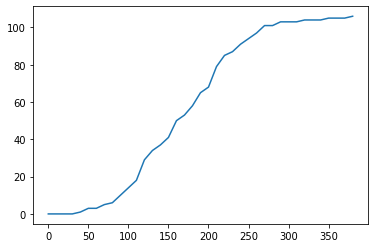

In [41]:
plt.plot(example2['dist_range'], example2['cumulative'])